In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosis

from scipy.stats import shapiro

#!pip install plotly
import plotly.graph_objects as go

#!pip install bt
import bt

#!pip install TA-Lib
#!pip install TA_Lib-0.4.19-cp37-cp37m-win_amd64.whl
import talib

In [3]:
google_Price = pd.read_csv('GOOG.csv', parse_dates=True, index_col = 'Date')
bitcoin_Price = pd.read_csv('Bitcoin.csv', parse_dates=True, index_col = 'Date')
amazon_Price = pd.read_csv('AMZN.csv', parse_dates=True, index_col = 'Date')
tesla_Price = pd.read_csv('TSLA.csv', parse_dates=True, index_col = 'Date')


In [4]:

def bring_me_stats(name):
    google_Price['Returns'] = google_Price['Adj Close'].pct_change()

# Plot the returns column over time
    print("Percentage change in returns:")
    google_Price['Returns'].plot()
    plt.show()
    
# Convert the decimal returns into percentage returns
    percent_return = google_Price['Returns']*100
    returns_plot = percent_return.dropna()
    print("Destribution of returns Histogram:")
    plt.hist(returns_plot, bins=75)
    plt.show()
    
    mean_return_daily = np.mean(google_Price['Returns'])
    print('Daily mean return: ', mean_return_daily)

    mean_return_annualized = ((1+mean_return_daily)**252)-1
    print('Annual mean return: ', mean_return_annualized)
    
# standard deviation
    sigma_daily = np.std(google_Price['Returns'])
    print('Daily sigma: ', sigma_daily)

    variance_daily = sigma_daily**2
    print('Variance daily: ',variance_daily)
    
    # Annualize the standard deviation
    sigma_annualized = sigma_daily*np.sqrt(252)
    print('Annualized sigma: ', sigma_annualized)

    variance_annualized = sigma_annualized**2
    print('Annualized variance: ',variance_annualized)
    
    clean_returns = google_Price['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
    returns_skewness = skew(clean_returns)
    print("Skewenes: ", returns_skewness)
    
# Calculate the excess kurtosis of the returns distribution
    excess_kurtosis = kurtosis(clean_returns)
    print('Excess kurtosis: ', excess_kurtosis)

# Derive the true fourth moment of the returns distribution
    fourth_moment = excess_kurtosis+3
    print('Excess kurtosis + 3 = ', fourth_moment)
    
#Shapiro_wilk test
    shapiro_results = shapiro(clean_returns)
    print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
    p_value = shapiro_results[1]
    print("P-value: ", p_value)

Percentage change in returns:


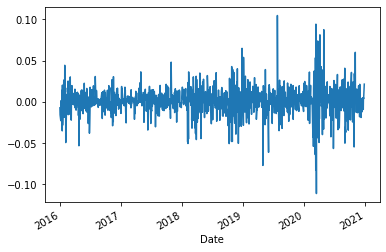

Destribution of returns Histogram:


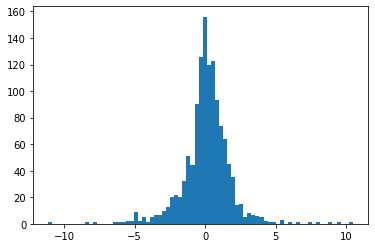

Daily mean return:  0.0007961752409426249
Annual mean return:  0.2220824530341825
Daily sigma:  0.016615981416183086
Variance daily:  0.0002760908384229417
Annualized sigma:  0.26377052769894765
Annualized variance:  0.0695748912825813
Skewenes:  -0.17319650770932393
Excess kurtosis:  6.513833251310267
Excess kurtosis + 3 =  9.513833251310267
Shapiro results: ShapiroResult(statistic=0.9138086438179016, pvalue=3.9194689661374056e-26)
P-value:  3.9194689661374056e-26


In [5]:
name = bitcoin_Price

bring_me_stats(name)

# Portfolio analysis:

In [6]:
StockReturns = pd.DataFrame()

In [7]:

StockReturns['Amazon'] = amazon_Price['Adj Close'].pct_change()
StockReturns['Tesla'] = tesla_Price['Adj Close'].pct_change()
StockReturns['Google'] = google_Price['Adj Close'].pct_change()


In [8]:
StockReturns = StockReturns.dropna()
StockReturns.head()

,Amazon,Tesla,Google
Date,,,
2015-12-30,-0.007061,0.003794,-0.007211
2015-12-31,-0.019127,0.007980,-0.015720
2016-01-04,-0.057554,-0.069167,-0.022454
2016-01-05,-0.005024,0.000224,0.000998
2016-01-06,-0.001799,-0.019691,0.001401


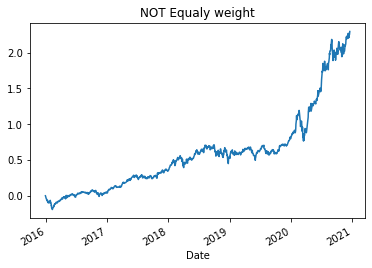

In [9]:
#adding portfolio weights
portfolio_weights = np.array([0.40, 0.15, 0.05])

# Calculate the weighted stock returns
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)

# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
CumulativeReturns.plot(title= 'NOT Equaly weight')
plt.show()

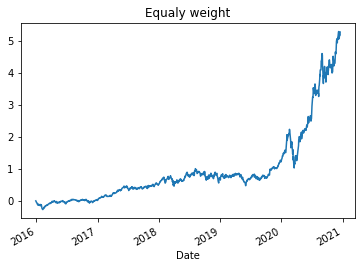

In [10]:
# number of stockes owned
numstocks = 3

#  array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculation of equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)

CumulativeReturnsEW = ((1+StockReturns["Portfolio_EW"]).cumprod()-1)
CumulativeReturnsEW.plot(title= 'Equaly weight')
plt.show()

          Amazon     Tesla   Google
Amazon  1.000000  0.370481  0.66714
Tesla   0.370481  1.000000  0.36638
Google  0.667140  0.366380  1.00000


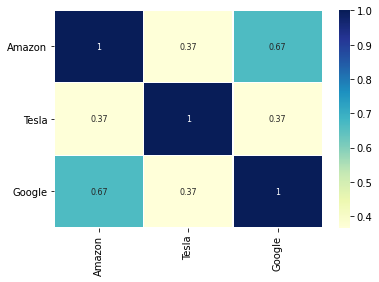

In [11]:
# correlation matrix
StockReturns_Portfolio = StockReturns.drop(['Portfolio', 'Portfolio_EW'], axis =1)

correlation_matrix = StockReturns_Portfolio.corr()

print(correlation_matrix)

#  heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [12]:
# covariance matrix
cov_mat = StockReturns_Portfolio.cov()

# Annualized co-variance matrix
cov_mat_annual = cov_mat*252

print(cov_mat_annual)

          Amazon     Tesla    Google
Amazon  0.092818  0.065276  0.053709
Tesla   0.065276  0.334460  0.055991
Google  0.053709  0.055991  0.069828


In [13]:
# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, 
                                      np.dot(cov_mat_annual, 
                                             portfolio_weights)))
print(portfolio_volatility)

0.1826802958951629


In [14]:
StockReturns.head()

,Amazon,Tesla,Google,Portfolio,Portfolio_EW
Date,,,,,
2015-12-30,-0.007061,0.003794,-0.007211,-0.002616,-0.003492
2015-12-31,-0.019127,0.007980,-0.015720,-0.007240,-0.008956
2016-01-04,-0.057554,-0.069167,-0.022454,-0.034519,-0.049725
2016-01-05,-0.005024,0.000224,0.000998,-0.001926,-0.001267
2016-01-06,-0.001799,-0.019691,0.001401,-0.003603,-0.006696


In [15]:
# Risk free rate
risk_free = 0

# Calculate the Sharpe Ratio for each asset
StockReturns['Sharpe'] = (StockReturns['Portfolio'] - risk_free) / portfolio_volatility

# Print the range of Sharpe ratios
print(StockReturns['Sharpe'].describe()[['min', 'max']])

min   -0.300509
max    0.309880
Name: Sharpe, dtype: float64


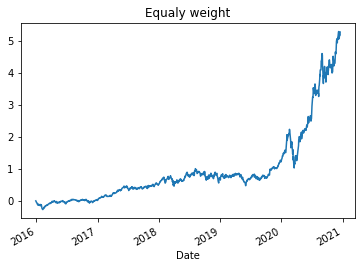

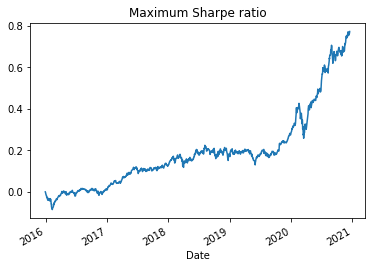

In [16]:
# Sort the portfolios by Sharpe ratio
sorted_portfolios = StockReturns.sort_values(by=['Sharpe'], ascending=False)

# Extract the corresponding weights
MSR_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the MSR weights as a numpy array
MSR_weights_array = np.array(MSR_weights)

# Calculate the MSR portfolio returns
StockReturns['Portfolio_MSR'] = StockReturns.iloc[:, 0:numstocks].mul(MSR_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
CumulativeReturnsEW.plot(title= 'Equaly weight')
plt.show()


CumulativeReturns_MSR = ((1+StockReturns["Portfolio_MSR"]).cumprod()-1)
CumulativeReturns_MSR.plot(title = 'Maximum Sharpe ratio')
plt.show()

In [17]:
StockReturns.head()

,Amazon,Tesla,Google,Portfolio,Portfolio_EW,Sharpe,Portfolio_MSR
Date,,,,,,,
2015-12-30,-0.007061,0.003794,-0.007211,-0.002616,-0.003492,-0.014319,-0.000740
2015-12-31,-0.019127,0.007980,-0.015720,-0.007240,-0.008956,-0.039632,-0.001996
2016-01-04,-0.057554,-0.069167,-0.022454,-0.034519,-0.049725,-0.188960,-0.014079
2016-01-05,-0.005024,0.000224,0.000998,-0.001926,-0.001267,-0.010543,-0.000387
2016-01-06,-0.001799,-0.019691,0.001401,-0.003603,-0.006696,-0.019724,-0.002126


# Charting functions: 

In [19]:
def show_me_daily_chart(data):
# creating candlestick data
    candlestick = go.Candlestick(
        x=data.index,
        open=data['Open'],
        high=data['High'],
        low=data['Low'],
        close=data['Close'])

# Creating the candlestick figure   
    fig = go.Figure(data=[candlestick])
    fig.update_layout(title='Candlestick Chart')                        
    fig.show()

In [23]:
show_me_daily_chart(amazon_Price)

In [27]:
def show_SMA(data):
# Calculate SMA
    temp = data
    temp['sma_50'] = temp['Close'].rolling(window=50).mean()

# Plot the SMA
    plt.plot(temp['sma_50'], color='green', label='SMA_50')
# Plot the close price
    plt.plot(temp['Close'], color='blue', label='Close')

# Customize and show the plot
    plt.title('50 Simple moving average')
    plt.legend()
    plt.show()

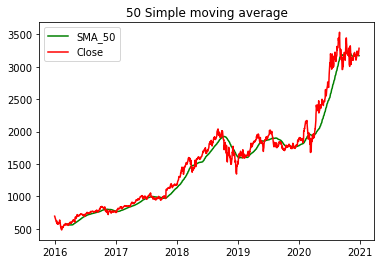

In [28]:
show_SMA(amazon_Price)

# Using Technical Analysis Library:

In [35]:
def show_talib_EMA(data):
    temp = data
# Calculate 12-day EMA
    temp['EMA_50'] = talib.EMA(temp['Close'], 50)
# Calculate 26-day EMA
    temp['EMA_200'] = talib.EMA(temp['Close'], 200)

# Plot the EMAs with price
    plt.plot(temp['EMA_50'], label='EMA_50')
    plt.plot(temp['EMA_200'], label='EMA_200')
    plt.plot(temp['Close'], label='Close')

# Customize and show the plot
    plt.legend()
    plt.title('EMAs')
    plt.show()

C:\Users\MMQuant\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



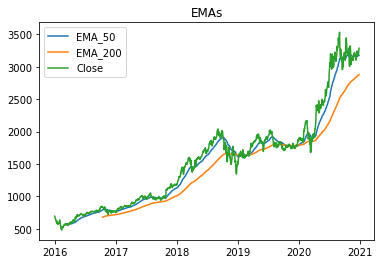

In [36]:
show_talib_EMA(amazon_Price)

# ADX indicator calculations and chart:

In [39]:
holder = amazon_Price

# Calculate the ADX with the default time period
holder['ADX_14'] = talib.ADX(holder['High'],
                            holder['Low'], 
                            holder['Close'])

# Calculate the ADX with the time period set to 21
holder['ADX_21'] = talib.ADX(holder['High'],
                            holder['Low'],
                            holder['Close'],
                            timeperiod=21)

# Print the last five rows
print(holder.tail())

               Open     High      Low    Close  Adj Close   Volume     sma_50  \
Date                                                                            
2020-12-21  3200.01  3226.97  3166.00  3206.18    3206.18  3836800  3184.5668   
2020-12-22  3202.84  3222.00  3180.08  3206.52    3206.52  2369400  3179.8386   
2020-12-23  3205.00  3210.13  3184.17  3185.27    3185.27  2093800  3174.6714   
2020-12-24  3193.90  3202.00  3169.00  3172.69    3172.69  1451900  3170.8510   
2020-12-28  3194.00  3304.00  3172.69  3283.96    3283.96  5674600  3169.7572   

                 EMA_12       EMA_26       EMA_50      EMA_200     ADX_14  \
Date                                                                        
2020-12-21  3182.925475  3171.974789  3166.894454  2862.398721  11.314234   
2020-12-22  3186.555402  3174.533693  3168.448397  2865.822813  10.710438   
2020-12-23  3186.357648  3175.328975  3169.108068  2869.001392  10.149770   
2020-12-24  3184.254933  3175.133496  3169.2485

C:\Users\MMQuant\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



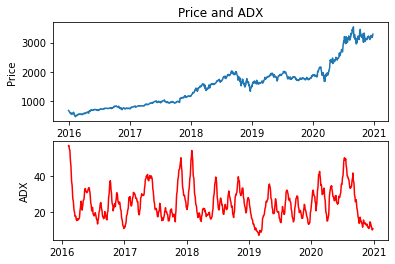

In [41]:
holder = amazon_Price

# Calculate ADX
holder['ADX'] = talib.ADX(holder['High'], 
                          holder['Low'], 
                          holder['Close'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(2)

# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(holder['Close'])

ax2.set_ylabel('ADX')
ax2.plot(holder['ADX'], color='red')

ax1.set_title('Price and ADX')
plt.show()

# RSI indicator calculations and charts: 

In [42]:
holder = amazon_Price
# Calculate RSI with the default time period
holder['RSI_14'] = talib.RSI(holder['Close'])

# Calculate RSI with a time period of 21
holder['RSI_21'] = talib.RSI(holder['Close'], timeperiod=21)

# Print the last five rows
print(holder.tail())

               Open     High      Low    Close  Adj Close   Volume     sma_50  \
Date                                                                            
2020-12-21  3200.01  3226.97  3166.00  3206.18    3206.18  3836800  3184.5668   
2020-12-22  3202.84  3222.00  3180.08  3206.52    3206.52  2369400  3179.8386   
2020-12-23  3205.00  3210.13  3184.17  3185.27    3185.27  2093800  3174.6714   
2020-12-24  3193.90  3202.00  3169.00  3172.69    3172.69  1451900  3170.8510   
2020-12-28  3194.00  3304.00  3172.69  3283.96    3283.96  5674600  3169.7572   

                 EMA_12       EMA_26       EMA_50      EMA_200     ADX_14  \
Date                                                                        
2020-12-21  3182.925475  3171.974789  3166.894454  2862.398721  11.314234   
2020-12-22  3186.555402  3174.533693  3168.448397  2865.822813  10.710438   
2020-12-23  3186.357648  3175.328975  3169.108068  2869.001392  10.149770   
2020-12-24  3184.254933  3175.133496  3169.2485

C:\Users\MMQuant\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



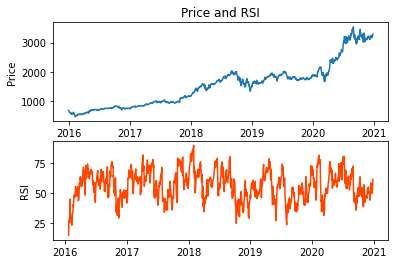

In [43]:
# Calculate RSI
holder['RSI'] = talib.RSI(holder['Close'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(holder['Close'])

ax2.set_ylabel('RSI')
ax2.plot(holder['RSI'], color='orangered')

ax1.set_title('Price and RSI')
plt.show()

# Bollinger Bands indicator calculations and chart:

1 standard deviation

C:\Users\MMQuant\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



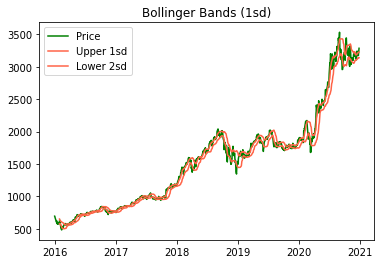

In [44]:
holder = amazon_Price
# Define the Bollinger Bands with 1-sd
upper_1sd, mid_1sd, lower_1sd = talib.BBANDS(holder['Close'], 
                                     nbdevup=1,
                                     nbdevdn=1,
                                     timeperiod=20)
# Plot the upper and lower Bollinger Bands 
plt.plot(holder['Close'], color='green', label='Price')
plt.plot(upper_1sd, color='tomato', label="Upper 1sd")
plt.plot(lower_1sd, color='tomato', label='Lower 1sd')

# Customize and show the plot
plt.legend(loc='upper left')
plt.title('Bollinger Bands (1sd)')
plt.show()

2 standard deviation:

C:\Users\MMQuant\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



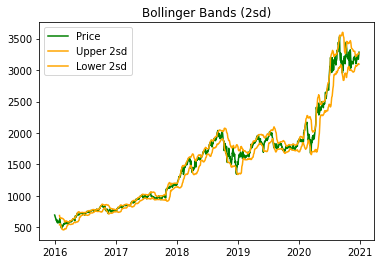

In [46]:
holder = amazon_Price
# Define the Bollinger Bands with 2-sd
upper_2sd, mid_2sd, lower_2sd = talib.BBANDS(holder['Close'],
                                     nbdevup=2,
                                     nbdevdn=2,
                                     timeperiod=20)
# Plot the upper and lower Bollinger Bands 
plt.plot(holder['Close'], color='green', label='Price')
plt.plot(upper_2sd, color='orange', label='Upper 2sd')
plt.plot(lower_2sd, color='orange', label='Lower 2sd')

# Customize and show the plot
plt.legend(loc='upper left')
plt.title('Bollinger Bands (2sd)')
plt.show()

3 standard deviation:

C:\Users\MMQuant\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



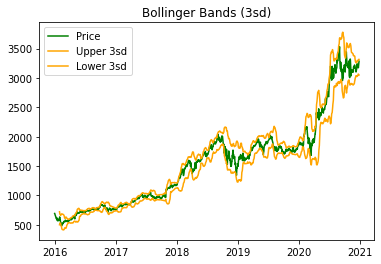

In [47]:
holder = amazon_Price
# Define the Bollinger Bands with 2-sd
upper_2sd, mid_2sd, lower_2sd = talib.BBANDS(holder['Close'],
                                     nbdevup=3,
                                     nbdevdn=3,
                                     timeperiod=20)
# Plot the upper and lower Bollinger Bands 
plt.plot(holder['Close'], color='green', label='Price')
plt.plot(upper_2sd, color='orange', label='Upper 3sd')
plt.plot(lower_2sd, color='orange', label='Lower 3sd')

# Customize and show the plot
plt.legend(loc='upper left')
plt.title('Bollinger Bands (3sd)')
plt.show()